In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("sample_data.csv")
df1 = pd.read_csv("sample_data.csv")
pd.set_option("display.max.columns", None)

In [3]:
df1.describe(include = 'all')

,entity,formattype,fromdate,titlecount,titles,todate,author,amazontotalreviews,minappleprice,amazontotalrevenue,accruedpreordersoldunits,amazonlumpedpreordersubscriptionrevenue,preordersalesrevenue,foundatamazon,barnesandnobleaccruedpreorderrevenue,amazonpreordersubscriptionunits,amazonlumpedpreordersalesrevenue,foundatbarnesandnoble,maxprice,lumpedpreordersubscriptionunits,applepreorderrevenue,amazontotalunits,totalrevenue,barnesandnobleaccruedpreorderunits,preorderunits,amazonsubscriptionrevenue,amazonlumpedpreorderrevenue,maxbarnesandnoblelistprice,maxlistprice,barnesandnoblesoldunits,maxapplelistprice,amazonaccruedpreordersubscriptionrevenue,accruedpreordersubscriptionunits,amazonkenpread,applesoldunits,minamazonlistprice,minprice,bookscanreported,appleaccruedpreorderunits,preorderperiod,datepublished,lumpedpreordersoldunits,accruedpreorderrevenue,maxamazonlistprice,amazonaccruedpreorderrevenue,barnesandnoblepreorderunits,amazonaccruedpreorderunits,minbarnesandnoblelistprice,appleaccruedpreorderrevenue,applelumpedpreorderunits,applesalesrevenue,preordersoldunits,lumpedpreordersalesrevenue,totalunits,maxamazonprice,amazonlumpedpreordersoldunits,amazonaveragerating,publishertype,accruedpreorderunits,amazonsalesrevenue,barnesandnoblesalesrevenue,amazoncategories,minlistprice,amazonaccruedpreordersalesrevenue,amazonlumpedpreorderunits,lumpedpreordersubscriptionrevenue,applelumpedpreorderrevenue,minamazonprice,subscriptionunits,amazonpreorderunits,publisherparent,amazonpreorderrevenue,amazonaccruedpreordersoldunits,amazonpreordersoldunits,salesrevenue,preordersubscriptionrevenue,lumpedpreorderunits,amazonaccruedpreordersubscriptionunits,formats,applepreorderunits,subscriptionrevenue,soldunits,minapplelistprice,barnesandnoblepreorderrevenue,amazonsubscriptionunits,amazonlumpedpreordersubscriptionunits,aapreported,accruedpreordersubscriptionrevenue,foundatapple,barnesandnoblelumpedpreorderrevenue,barnesandnoblelumpedpreorderunits,minbarnesandnobleprice,accruedpreordersalesrevenue,maxbarnesandnobleprice,preorderrevenue,pubtrackreported,lumpedpreorderrevenue,amazonsoldunits,amazonpreordersubscriptionrevenue,preordersubscriptionunits,amazonpreordersalesrevenue,maxappleprice,pagelength,pricewassetbypublisher,barnesandnobledistributor,appledistributor
count,6539,6539,6.539000e+03,6539.000000,6539,6.539000e+03,6539,6522.000000,6539.000000,6539.000000,6539.000000,6539.0,6539.000000,6539.000000,6539.0,6539.0,6539.000000,6539.000000,6539.000000,6539.0,6539.0,6539.000000,6539.000000,6539.0,6539.000000,6539.000000,6539.000000,6539.0,6539.000000,6539.000000,6539.0,6539.0,6539.0,6539.0,6539.000000,6539.000000,6539.000000,6539.000000,6539.0,6539.000000,6539,6539.000000,6539.000000,6539.000000,6539.000000,6539.0,6539.000000,6539.0,6539.0,6539.0,6539.000000,6539.000000,6539.000000,6539.000000,6539.000000,6539.000000,6523.000000,6539,6539.000000,6539.000000,6539.000000,6534,6539.000000,6539.000000,6539.000000,6539.0,6539.0,6539.000000,6539.000000,6539.000000,6539,6539.000000,6539.000000,6539.000000,6539.000000,6539.0,6539.000000,6539.0,6538,6539.0,6539.000000,6539.000000,6539.0,6539.0,6539.000000,6539.0,6539.000000,6539.0,6539.000000,6539.0,6539.0,6539.000000,6539.000000,6539.000000,6539.000000,6539.000000,6539.000000,6539.000000,6539.0,6539.0,6539.000000,6539.000000,2558.000000,1531.0,1735,756
unique,2,3,NaN,NaN,3976,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2
top,The Walking Dead,print,NaN,NaN,"{'amazontotalreviews': 283, 'minappleprice': 0...",NaN,Matthew Murdock,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-09-29

In [4]:
#Calculating percentage of missing values in the dataframe
def missing(data):
    print (round((data.isnull().sum() * 100/ len(data)),2).sort_values(ascending=False))
missing = missing(df1)

appledistributor                            88.44
pricewassetbypublisher                      76.59
barnesandnobledistributor                   73.47
pagelength                                  60.88
amazontotalreviews                           0.26
amazonaveragerating                          0.24
amazoncategories                             0.08
formats                                      0.02
barnesandnoblepreorderunits                  0.00
minprice                                     0.00
maxlistprice                                 0.00
barnesandnoblesoldunits                      0.00
maxapplelistprice                            0.00
amazonaccruedpreordersubscriptionrevenue     0.00
accruedpreordersubscriptionunits             0.00
amazonkenpread                               0.00
applesoldunits                               0.00
minamazonlistprice                           0.00
bookscanreported                             0.00
amazonaccruedpreorderrevenue                 0.00


In [5]:
#Removing columns with most percentage of null values
df1 = df1.drop(['appledistributor','pricewassetbypublisher','barnesandnobledistributor','pagelength'],axis = 1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6539 entries, 0 to 6538
Columns: 102 entries, entity to maxappleprice
dtypes: float64(2), int64(91), object(9)
memory usage: 5.1+ MB


In [6]:
#Removing 'titles' column
df1=df1.drop('titles',axis =1)

#Removing columns whose sum is zero
df1 = df1.drop(['amazonlumpedpreordersubscriptionrevenue','barnesandnobleaccruedpreorderrevenue','amazonpreordersubscriptionunits','lumpedpreordersubscriptionunits','applepreorderrevenue','barnesandnobleaccruedpreorderunits','maxbarnesandnoblelistprice','maxapplelistprice','amazonaccruedpreordersubscriptionrevenue','accruedpreordersubscriptionunits','amazonkenpread','appleaccruedpreorderunits','barnesandnoblepreorderunits','minbarnesandnoblelistprice','appleaccruedpreorderrevenue','applelumpedpreorderunits','lumpedpreordersubscriptionrevenue','applelumpedpreorderrevenue','preordersubscriptionrevenue','amazonaccruedpreordersubscriptionunits','applepreorderunits','minapplelistprice','barnesandnoblepreorderrevenue','accruedpreordersubscriptionrevenue','amazonlumpedpreordersubscriptionunits','barnesandnoblelumpedpreorderrevenue','barnesandnoblelumpedpreorderunits','amazonpreordersubscriptionrevenue','preordersubscriptionunits'],axis = 1)


## Treating missing values in amazontotalreviews

In [7]:
df1['amazontotalreviews'].describe(include = 'all')

count    6522.000000
mean      242.896044
std        57.042772
min       120.000000
25%       200.000000
50%       250.000000
75%       283.000000
max       331.000000
Name: amazontotalreviews, dtype: float64

In [8]:
##Filtering data frame to fill the missing values in amazontotalreviews
#Alone in dark - print format
r = df1[(df1['entity']=='Alone in the dark') & (df1['formattype']=='print')]
r.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1532 entries, 0 to 1531
Data columns (total 72 columns):
entity                               1532 non-null object
formattype                           1532 non-null object
fromdate                             1532 non-null int64
titlecount                           1532 non-null int64
todate                               1532 non-null int64
author                               1532 non-null object
amazontotalreviews                   1532 non-null float64
minappleprice                        1532 non-null int64
amazontotalrevenue                   1532 non-null int64
accruedpreordersoldunits             1532 non-null int64
preordersalesrevenue                 1532 non-null int64
foundatamazon                        1532 non-null int64
amazonlumpedpreordersalesrevenue     1532 non-null int64
foundatbarnesandnoble                1532 non-null int64
maxprice                             1532 non-null int64
amazontotalunits                 

In [9]:
#Alone in dark - Ebook format
s = df1[(df1['entity']=='Alone in the dark') & (df1['formattype']=='ebook')]

#there are null values in amazontotalreviews hence filling it
s['amazontotalreviews'].fillna((s['amazontotalreviews'].mean()), inplace=True)   #filling null values with mean
s.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 887 entries, 1532 to 2418
Data columns (total 72 columns):
entity                               887 non-null object
formattype                           887 non-null object
fromdate                             887 non-null int64
titlecount                           887 non-null int64
todate                               887 non-null int64
author                               887 non-null object
amazontotalreviews                   887 non-null float64
minappleprice                        887 non-null int64
amazontotalrevenue                   887 non-null int64
accruedpreordersoldunits             887 non-null int64
preordersalesrevenue                 887 non-null int64
foundatamazon                        887 non-null int64
amazonlumpedpreordersalesrevenue     887 non-null int64
foundatbarnesandnoble                887 non-null int64
maxprice                             887 non-null int64
amazontotalunits                     887 non-n

C:\Users\Srujan\Anaconda\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [10]:
#Alone in dark - Audio format
t = df1[(df1['entity']=='Alone in the dark') & (df1['formattype']=='audio')]
t.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 621 entries, 2419 to 3039
Data columns (total 72 columns):
entity                               621 non-null object
formattype                           621 non-null object
fromdate                             621 non-null int64
titlecount                           621 non-null int64
todate                               621 non-null int64
author                               621 non-null object
amazontotalreviews                   621 non-null float64
minappleprice                        621 non-null int64
amazontotalrevenue                   621 non-null int64
accruedpreordersoldunits             621 non-null int64
preordersalesrevenue                 621 non-null int64
foundatamazon                        621 non-null int64
amazonlumpedpreordersalesrevenue     621 non-null int64
foundatbarnesandnoble                621 non-null int64
maxprice                             621 non-null int64
amazontotalunits                     621 non-n

In [11]:
#The Walking Dead - print format
u = df1[(df1['entity']=='The Walking Dead') & (df1['formattype']=='print')]
#there is one null value in amazontotalreviews hence filling it
u['amazontotalreviews'].fillna((u['amazontotalreviews'].mean()), inplace=True)   #filling null values with mean
u.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1778 entries, 3040 to 4817
Data columns (total 72 columns):
entity                               1778 non-null object
formattype                           1778 non-null object
fromdate                             1778 non-null int64
titlecount                           1778 non-null int64
todate                               1778 non-null int64
author                               1778 non-null object
amazontotalreviews                   1778 non-null float64
minappleprice                        1778 non-null int64
amazontotalrevenue                   1778 non-null int64
accruedpreordersoldunits             1778 non-null int64
preordersalesrevenue                 1778 non-null int64
foundatamazon                        1778 non-null int64
amazonlumpedpreordersalesrevenue     1778 non-null int64
foundatbarnesandnoble                1778 non-null int64
maxprice                             1778 non-null int64
amazontotalunits              

In [12]:
#The Walking Dead - ebook format
v = df1[(df1['entity']=='The Walking Dead') & (df1['formattype']=='ebook')]
#there are 11 null values in amazontotalreviews hence filling it
v['amazontotalreviews'].fillna((v['amazontotalreviews'].mean()), inplace=True)   #filling null values with mean
v.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 874 entries, 4818 to 5691
Data columns (total 72 columns):
entity                               874 non-null object
formattype                           874 non-null object
fromdate                             874 non-null int64
titlecount                           874 non-null int64
todate                               874 non-null int64
author                               874 non-null object
amazontotalreviews                   874 non-null float64
minappleprice                        874 non-null int64
amazontotalrevenue                   874 non-null int64
accruedpreordersoldunits             874 non-null int64
preordersalesrevenue                 874 non-null int64
foundatamazon                        874 non-null int64
amazonlumpedpreordersalesrevenue     874 non-null int64
foundatbarnesandnoble                874 non-null int64
maxprice                             874 non-null int64
amazontotalunits                     874 non-n

In [13]:
#The Walking Dead - audio format
w = df1[(df1['entity']=='The Walking Dead') & (df1['formattype']=='audio')]
w.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 847 entries, 5692 to 6538
Data columns (total 72 columns):
entity                               847 non-null object
formattype                           847 non-null object
fromdate                             847 non-null int64
titlecount                           847 non-null int64
todate                               847 non-null int64
author                               847 non-null object
amazontotalreviews                   847 non-null float64
minappleprice                        847 non-null int64
amazontotalrevenue                   847 non-null int64
accruedpreordersoldunits             847 non-null int64
preordersalesrevenue                 847 non-null int64
foundatamazon                        847 non-null int64
amazonlumpedpreordersalesrevenue     847 non-null int64
foundatbarnesandnoble                847 non-null int64
maxprice                             847 non-null int64
amazontotalunits                     847 non-n

In [14]:
frames = [r,s,t,u,v,w]
df1 = pd.concat(frames)


## Treating missing values in formats

In [15]:
df1['formats'].describe(include = 'all')

count          6538
unique           14
top       Hardcover
freq           1109
Name: formats, dtype: object

In [16]:
df1 = df1.fillna({'formats': 'Hardcover'})
df1['formats'].describe()

count          6539
unique           14
top       Hardcover
freq           1110
Name: formats, dtype: object

## Treating missing values in amazoncategories

In [17]:
df1['amazoncategories'].describe(include = 'all')

count                                                  6534
unique                                                   36
top       Kindle eBooks > Teen & Young Adult > Literatur...
freq                                                    579
Name: amazoncategories, dtype: object

In [18]:
df1['amazoncategories'].fillna(df1['amazoncategories'].mode()[0], inplace=True)
df1['amazoncategories'].describe(include = 'all')

count                                                  6539
unique                                                   36
top       Kindle eBooks > Teen & Young Adult > Literatur...
freq                                                    584
Name: amazoncategories, dtype: object

## Treating missing values in amazonaveragerating

In [19]:
df1['amazonaveragerating'].describe(include = 'all')

count    6523.000000
mean      453.302162
std        13.736645
min       410.000000
25%       440.000000
50%       460.000000
75%       470.000000
max       470.000000
Name: amazonaveragerating, dtype: float64

In [20]:
#Alone in dark
l = df1[(df1['entity']=='Alone in the dark')]

#there are null values in amazontotalreviews hence filling it
l['amazonaveragerating'].fillna((l['amazonaveragerating'].mean()), inplace=True)   #filling null values with mean
l.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3040 entries, 0 to 3039
Data columns (total 72 columns):
entity                               3040 non-null object
formattype                           3040 non-null object
fromdate                             3040 non-null int64
titlecount                           3040 non-null int64
todate                               3040 non-null int64
author                               3040 non-null object
amazontotalreviews                   3040 non-null float64
minappleprice                        3040 non-null int64
amazontotalrevenue                   3040 non-null int64
accruedpreordersoldunits             3040 non-null int64
preordersalesrevenue                 3040 non-null int64
foundatamazon                        3040 non-null int64
amazonlumpedpreordersalesrevenue     3040 non-null int64
foundatbarnesandnoble                3040 non-null int64
maxprice                             3040 non-null int64
amazontotalunits                 

In [21]:
#The Walking Dead
m = df1[(df1['entity']=='The Walking Dead')]

#there are null values in amazontotalreviews hence filling it
m['amazonaveragerating'].fillna((m['amazonaveragerating'].mean()), inplace=True)   #filling null values with mean
m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3499 entries, 3040 to 6538
Data columns (total 72 columns):
entity                               3499 non-null object
formattype                           3499 non-null object
fromdate                             3499 non-null int64
titlecount                           3499 non-null int64
todate                               3499 non-null int64
author                               3499 non-null object
amazontotalreviews                   3499 non-null float64
minappleprice                        3499 non-null int64
amazontotalrevenue                   3499 non-null int64
accruedpreordersoldunits             3499 non-null int64
preordersalesrevenue                 3499 non-null int64
foundatamazon                        3499 non-null int64
amazonlumpedpreordersalesrevenue     3499 non-null int64
foundatbarnesandnoble                3499 non-null int64
maxprice                             3499 non-null int64
amazontotalunits              

In [22]:
frame = [l,m]
df1 = pd.concat(frame)

In [23]:
#converting categorical value to numeric
from sklearn.preprocessing import LabelEncoder
cat = LabelEncoder()
df1["formattype"] =cat.fit_transform(df1["formattype"]) #0 for print, 1 for audio and 2 for ebook
df1["entity"] = cat.fit_transform(df1["entity"]) #0 for 'Alone in the dark' and 1 for 'The Walking Dead'
df1["author"] =cat.fit_transform(df1["author"]) #0 for Frith Banbury and 1 for Mathew Murdock
df1["publisherparent"] =cat.fit_transform(df1["publisherparent"]) #0 for Simon & Schuster, 1 for Simon & Schuster Audio and Blackstone Audio and 2 for Pocket
df1["publishertype"] =cat.fit_transform(df1["publishertype"]) #0 for Bigfive and 1 for uncategorizedmanyauthor
df1.head()

,entity,formattype,fromdate,titlecount,todate,author,amazontotalreviews,minappleprice,amazontotalrevenue,accruedpreordersoldunits,preordersalesrevenue,foundatamazon,amazonlumpedpreordersalesrevenue,foundatbarnesandnoble,maxprice,amazontotalunits,totalrevenue,preorderunits,amazonsubscriptionrevenue,amazonlumpedpreorderrevenue,maxlistprice,barnesandnoblesoldunits,applesoldunits,minamazonlistprice,minprice,bookscanreported,preorderperiod,datepublished,lumpedpreordersoldunits,accruedpreorderrevenue,maxamazonlistprice,amazonaccruedpreorderrevenue,amazonaccruedpreorderunits,applesalesrevenue,preordersoldunits,lumpedpreordersalesrevenue,totalunits,maxamazonprice,amazonlumpedpreordersoldunits,amazonaveragerating,publishertype,accruedpreorderunits,amazonsalesrevenue,barnesandnoblesalesrevenue,amazoncategories,minlistprice,amazonaccruedpreordersalesrevenue,amazonlumpedpreorderunits,minamazonprice,subscriptionunits,amazonpreorderunits,publisherparent,amazonpreorderrevenue,amazonaccruedpreordersoldunits,amazonpreordersoldunits,salesrevenue,lumpedpreorderunits,formats,subscriptionrevenue,soldunits,amazonsubscriptionunits,aapreported,foundatapple,minbarnesandnobleprice,accruedpreordersalesrevenue,maxbarnesandnobleprice,preorderrevenue,pubtrackreported,lumpedpreorderrevenue,amazonsoldunits,amazonpreordersalesrevenue,maxappleprice
0,0,2,20170418,1,20170419,0,306.0,0,0,0,0,1,0,0,0,6,0,0,0,0,0,0,0,0,0,1,0,2009-05-12,0,0,0,0,0,0,0,0,6,0,0,410.0,0,0,0,0,Books > Books on CD > Mystery & Thrillers ; Bo...,0,0,0,0,0,0,1,0,0,0,0,0,Audio CD,0,6,0,1,0,0,0,0,0,1,0,6,0,0
1,0,2,20170419,1,20170420,0,306.0,0,702,0,0,1,0,0,702,7,702,0,0,0,702,0,0,0,0,1,0,2009-05-12,0,0,702,0,0,0,0,0,7,702,0,410.0,0,0,702,0,Books > Books on CD > Mystery & Thrillers ; Bo...,0,0,0,0,0,0,1,0,0,0,702,0,Audio CD,0,7,0,1,0,0,0,0,0,1,0,7,0,0
2,0,2,20170420,1,20170421,0,306.0,0,4914,0,0,1,0,0,702,7,4914,0,0,0,702,0,0,702,702,1,0,2009-05-12,0,0,702,0,0,0,0,0,7,702,0,410.0,0,0,4914,0,Books > Books on CD > Mystery & Thrillers ; Bo...,702,0,0,702,0,0,1,0,0,0,4914,0,Audio CD,0,7,0,1,0,0,0,0,0,1,0,7,0,0
3,0,2,20170421,1,20170422,0,306.0,0,4212,0,0,1,0,0,702,6,4212,0,0,0,702,0,0,702,702,1,0,2009-05-12,0,0,702,0,0,0,0,0,6,702,0,410.0,0,0,4212,0,Books > Books on CD > Mystery & Thrillers ; Bo...,702,0,0,702,0,0,1,0,0,0,4212,0,Audio CD,0,6,0,1,0,0,0,0,0,1,0,6,0,0
4,0,2,20170422,1,20170423,0,306.0,0,702,0,0,1,0,0,702,1,702,0,0,0,702,0,0,702,702,1,0,2009-05-12,0,0,702,0,0,0,0,0,1,702,0,410.0,0,0,702,0,Books > Books on CD > Mystery & Thrillers ; Bo...,702,0,0,702,0,0,1,0,0,0,702,0,Audio CD,0,1,0,1,0,0,0,0,0,1,0,1,0,0


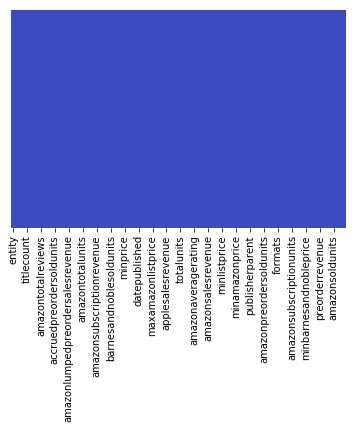

In [24]:
sns.heatmap(df1.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

## Visualization

In [25]:
df2 = pd.DataFrame(df1, columns = ['entity','formattype','titlecount','fromdate','totalrevenue','publishertype','publisherparent','author']) 


In [26]:
entity_1 = df2.iloc[1:3040]

In [27]:
entity_1['fromdate']= entity_1['fromdate'].astype(str).str[:4]


C:\Users\Srujan\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


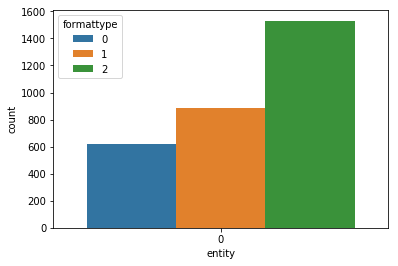

In [29]:
ax = sns.countplot(x="entity", hue="formattype", data =entity_1)

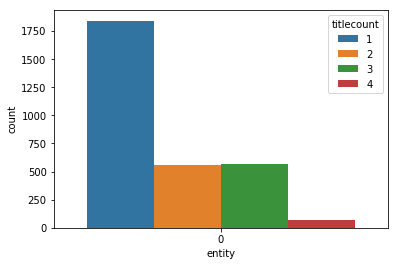

In [30]:
ax = sns.countplot(x="entity", hue="titlecount", data=entity_1)


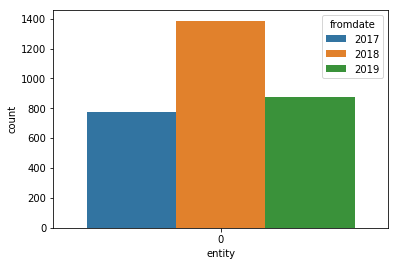

In [31]:
ax = sns.countplot(x="entity", hue="fromdate", data=entity_1)

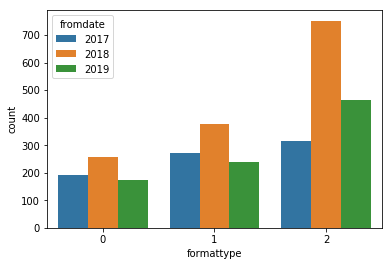

In [32]:
ax = sns.countplot(x="formattype", hue="fromdate", data=entity_1)


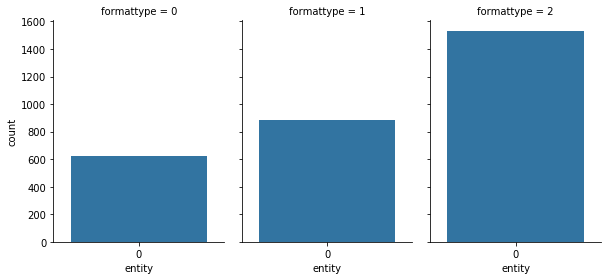

In [33]:
g = sns.catplot(x="entity", col="formattype",data=entity_1, kind="count",height=4, aspect=.7)


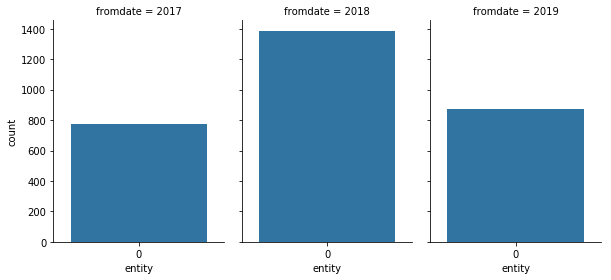

In [34]:
g = sns.catplot(x="entity", col="fromdate",data=entity_1, kind="count",height=4, aspect=.7)

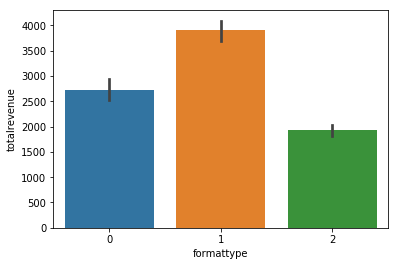

In [36]:
sns.barplot(x ='formattype', y ='totalrevenue', data = entity_1, estimator = np.std) 

In [41]:
entity_2 = df2.iloc[3040:] #for Walking Dead
entity_2['fromdate']= entity_2['fromdate'].astype(str).str[:4]


C:\Users\Srujan\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


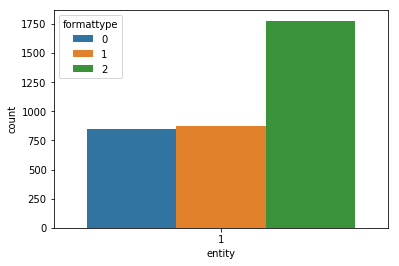

In [42]:
ax = sns.countplot(x="entity", hue="formattype", data=entity_2)

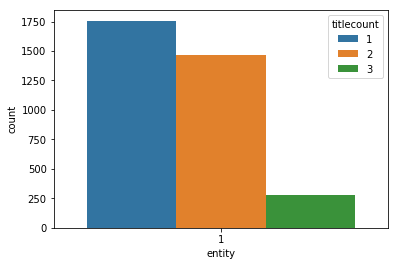

In [43]:
ax = sns.countplot(x="entity", hue="titlecount", data=entity_2)

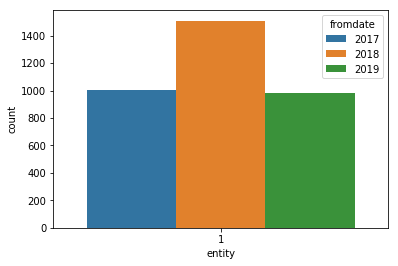

In [44]:
ax = sns.countplot(x="entity", hue="fromdate", data=entity_2)

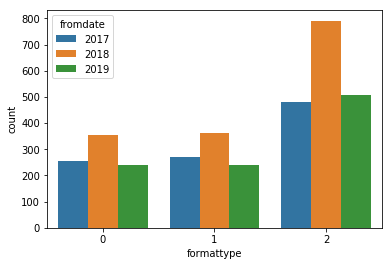

In [45]:
ax = sns.countplot(x="formattype", hue="fromdate", data=entity_2)

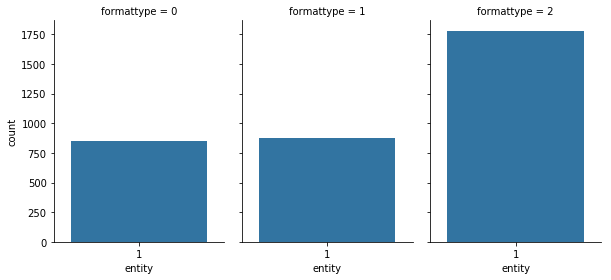

In [46]:
g = sns.catplot(x="entity", col="formattype",data=entity_2, kind="count",height=4, aspect=.7);

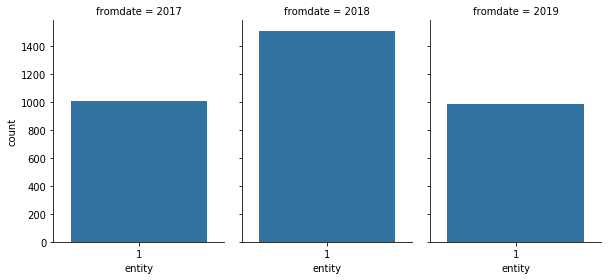

In [47]:
g = sns.catplot(x="entity", col="fromdate",data=entity_2, kind="count",height=4, aspect=.7);

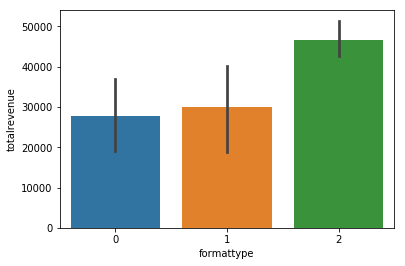

In [48]:
sns.barplot(x ='formattype', y ='totalrevenue', data = entity_2, estimator = np.std) 

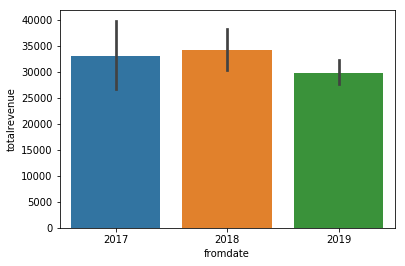

In [53]:
framee=[entity_1,entity_2]
df3 = pd.concat(framee)
sns.barplot(x ='fromdate', y ='totalrevenue', data = df3, estimator = np.std) 


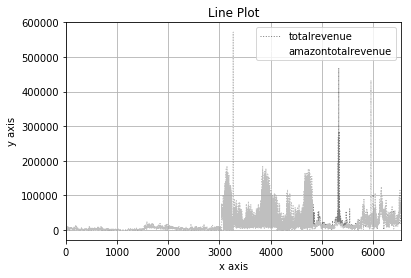

In [55]:
#Visualizing total revenue
df1.totalrevenue.plot(kind = 'line', color = 'k',label = 'totalrevenue',linewidth=1,alpha = 0.5,grid = True,linestyle = ':')
df1.amazontotalrevenue.plot(color = 'w',label = 'amazontotalrevenue',linewidth=1, alpha = 0.5,grid = True,linestyle = '-.')
plt.legend(loc='upper right')     
plt.xlabel('x axis')              
plt.ylabel('y axis')
plt.title('Line Plot')            
plt.show() 

#### Hence we can conclude that 'totalrevenue' in some cases is same as 'amazontotalrevenue', whereas in some cases it is sum of 'amazontotalrevenue' as well as other features

In [56]:
rev = [feature for feature in df1.columns if 'revenue' in feature]
revenue = df1[rev]

sales_revenue = [feature for feature in revenue.columns if 'accrued' and 'sales' in feature]
sales_revenue = revenue[sales_revenue]
sales_revenue.head()

,preordersalesrevenue,amazonlumpedpreordersalesrevenue,applesalesrevenue,lumpedpreordersalesrevenue,amazonsalesrevenue,barnesandnoblesalesrevenue,amazonaccruedpreordersalesrevenue,salesrevenue,accruedpreordersalesrevenue,amazonpreordersalesrevenue
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,702,0,0,702,0,0
2,0,0,0,0,4914,0,0,4914,0,0
3,0,0,0,0,4212,0,0,4212,0,0
4,0,0,0,0,702,0,0,702,0,0


#### Hence we can observe that sales revenue is the sum of all the rest of sales as well as accrued revenue columns

In [59]:
total=[]
total = revenue['amazontotalrevenue']+revenue['applesalesrevenue']
total

0            0
1          702
2         4914
3         4212
4          702
5         4914
6         4212
7            0
8         2808
9         8424
10        5616
11           0
12        2808
13        5616
14        3510
15        3510
16        3510
17        1404
18        2808
19        4212
20        2106
21        2808
22        4914
23        4212
24        4212
25        4212
26        2808
27         702
28        2640
29        5940
         ...  
6509     33930
6510     43212
6511     94211
6512     74152
6513     20059
6514     46306
6515     54093
6516     67964
6517     57083
6518     60177
6519     58682
6520     52598
6521     71162
6522     55692
6523     60281
6524     83434
6525    114374
6526     81939
6527     49504
6528     74256
6529     55692
6530     37128
6531     37128
6532     40222
6533     86528
6534     81835
6535     18460
6536     38623
6537     80340
6538     43212
Length: 6539, dtype: int64

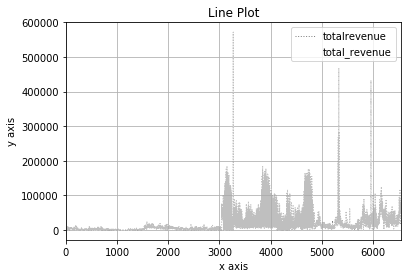

In [63]:
#Now again visualizing total revenue
df1.totalrevenue.plot(kind = 'line', color = 'k',label = 'totalrevenue',linewidth=1,alpha = 0.5,grid = True,linestyle = ':')
total.plot(color = 'w',label = 'total_revenue',linewidth=1, alpha = 0.5,grid = True,linestyle = '-.')
plt.legend(loc='upper right')     
plt.xlabel('x axis')              
plt.ylabel('y axis')
plt.title('Line Plot')            
plt.show()

#### Hence we can conclude that total revenue is calculated

In [80]:
def missing(dt):
    print (round((df1['amazontotalrevenue'] * 100/ df1['totalrevenue']),2))
missing(df1)
#This gives what percentage of amazon revenue is from the total revenue

0         NaN
1       100.0
2       100.0
3       100.0
4       100.0
5       100.0
6       100.0
7         NaN
8       100.0
9       100.0
10      100.0
11        NaN
12      100.0
13      100.0
14      100.0
15      100.0
16      100.0
17      100.0
18      100.0
19      100.0
20      100.0
21      100.0
22      100.0
23      100.0
24      100.0
25      100.0
26      100.0
27      100.0
28      100.0
29      100.0
        ...  
6509    100.0
6510    100.0
6511    100.0
6512    100.0
6513    100.0
6514    100.0
6515    100.0
6516    100.0
6517    100.0
6518    100.0
6519    100.0
6520    100.0
6521    100.0
6522    100.0
6523    100.0
6524    100.0
6525    100.0
6526    100.0
6527    100.0
6528    100.0
6529    100.0
6530    100.0
6531    100.0
6532    100.0
6533    100.0
6534    100.0
6535    100.0
6536    100.0
6537    100.0
6538    100.0
Length: 6539, dtype: float64
